<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "insurance.csv"  # Replace with your file path
insurance_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(insurance_df.head())

## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [ ]:
import pandas as pd
from tabulate import tabulate

# Count missing values per column
missing_values_per_column = insurance_df.isnull().sum()

# Create a table for missing values
table = [(col, missing) for col, missing in missing_values_per_column.items()]

# Print the table using tabulate
print(tabulate(table, headers=["Column Name", "Missing Values"], tablefmt="grid"))



In [13]:
#  **Column Name** | **Type**             | **Reason**                |
# |------------------|----------------------|-------------------------|
# | `age`           | Numerical            | Continuous               |
# | `sex`           | Categorical          | male/female
# | `bmi`           | Numerical            | Continuous               |
# | `children`      | Numerical (Discrete) | Count of children is a whole number.           |
# | `smoker`        | Categorical          | Binary category (yes/no)                    |
# | `region`        | Categorical          | distinct groups (regions).          |
# | `charges`       | Numerical            | Continuous     |


# Variables categorized into tuples
numerical_var = ("age", "bmi", "children", "charges")
categorical_var = ("sex", "smoker", "region")


## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [ ]:
# Converting var tuples to lists
numerical_var_list = list(numerical_var)
categorical_var_list = list(categorical_var)


numerical_stats = insurance_df[numerical_var_list].describe()
categorical_stats = insurance_df[categorical_var_list].describe()


table_numerical_stats = tabulate(
    numerical_stats.reset_index(), 
    headers=["Statistic"] + numerical_var_list, 
    tablefmt="grid"
)

table_categorical_stats = tabulate(
    categorical_stats.reset_index(),
    headers=["Statistic"] + categorical_var_list,
    tablefmt="grid"
)

# Print descriptive statistics in tabulated format
print("Descriptive Statistics for Numerical Variables:")
print(table_numerical_stats)

# Print descriptive statistics in tabulated format
print("Descriptive Statistics for Numerical Variables:")
print(table_categorical_stats)



## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


In [ ]:
import matplotlib.pyplot as plt


# Plot histograms with numbers on top
for col in numerical_var:
    plt.figure(figsize=(8, 5))
    counts, bins, patches = plt.hist(insurance_df[col], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add numbers on top of each bar
    for i in range(len(patches)):
        plt.text(
            bins[i] + (bins[1] - bins[0]) / 2,  # X position (center of the bin)
            counts[i] + 0.2,  # Y position (slightly above the bar)
            int(counts[i]),  # Text to display (count)
            ha='center', va='bottom', fontsize=10
        )

    plt.show()

## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


In [ ]:
import matplotlib.pyplot as plt

target_variable = 'charges'

for var in numerical_var_list:
    if var == target_variable:
        # Skip plotting if the variable is the same as the target
        continue
    
    plt.figure()  # Create a new figure for each plot
    plt.scatter(insurance_df[var], insurance_df[target_variable], alpha=0.7, edgecolor='black')
    plt.title(f'Scatter Plot of {target_variable} vs {var}')
    plt.xlabel(var)
    plt.ylabel(target_variable)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


In [ ]:
import seaborn as sns


# Plot distributions
for cat_var in categorical_var_list:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=insurance_df[cat_var], y=insurance_df[target_variable], palette="Set2")
    plt.title(f"Distribution of {target_variable} by {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel(target_variable)
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


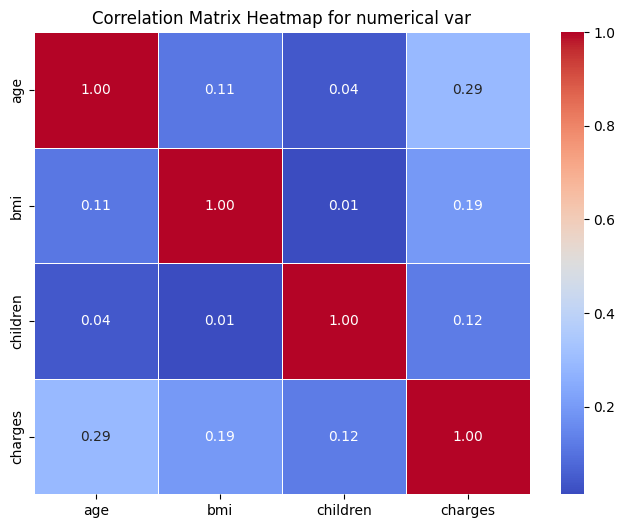

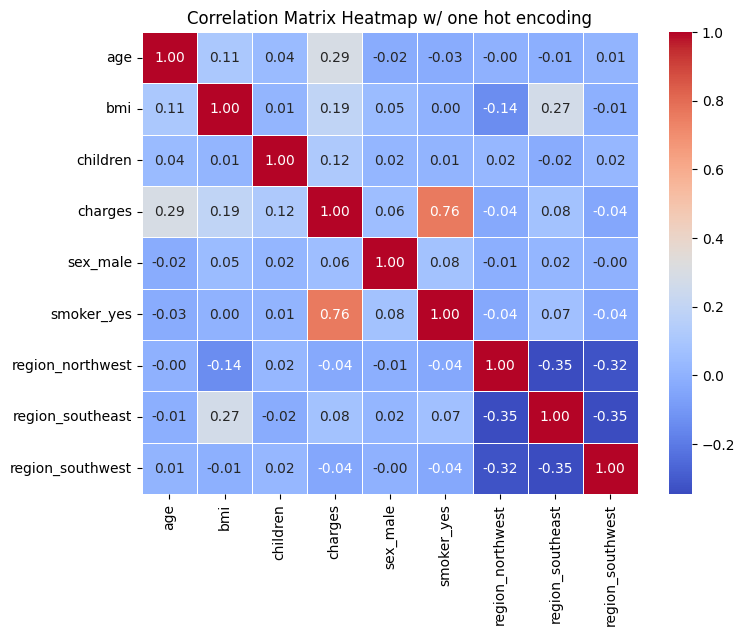

In [49]:
correlation_matrix = insurance_df.select_dtypes(include=['float64', 'int64']).corr()

# SVisualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Display correlation values on the heatmap
    cmap="coolwarm",   # Color map for visualization
    fmt=".2f",         # Format to 2 decimal places
    linewidths=0.5     # Add space between cells
)
plt.title("Correlation Matrix Heatmap for numerical var")
plt.show()


# trying one hot encoding for categorical var
encoded_df = pd.get_dummies(insurance_df, drop_first=True)
correlation_matrix_encoded = encoded_df.corr()

# SVisualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_encoded,
    annot=True,        # Display correlation values on the heatmap
    cmap="coolwarm",   # Color map for visualization
    fmt=".2f",         # Format to 2 decimal places
    linewidths=0.5     # Add space between cells
)
plt.title("Correlation Matrix Heatmap w/ one hot encoding")
plt.show()




In [ ]:
# smoker_yes and charges (0.76)
# Being a smoker is highly correlated with higher charges. This suggests that smokers are likely to have higher medical expenses.

# Moderate Positive Correlations:

# age and charges (0.29)
# There is a moderate positive correlation between age and charges, indicating that older individuals tend to have slightly higher medical costs.

# bmi and charges (0.19)
# Higher BMI shows some correlation with higher charges, possibly reflecting health risks associated with obesity.

# region_southeast and bmi (0.27):
# People in the southeast region tend to have higher BMI values.

# Regional variables (region_northwest, region_southeast, region_southwest) exhibit no significant correlation with charges

# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [50]:
charges_mean = round(insurance_df[target_variable].mean(), 2)
print(f"The mean of our target variable '{target_variable}' is {charges_mean}")


# Establishing a naive baseline in regression provides a simple benchmark for model performance. 
# It helps identify if a model is adding value by exagerating trivial predictions, showing overfitting or underfitting. 
# Without a baseline, it's difficult to evaluate MSE or R2 and determine if a model is effective or shoudl be improved.

The mean of our target variable 'charges' is 15799.57


## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment



Performing Linear Regression for Feature: age


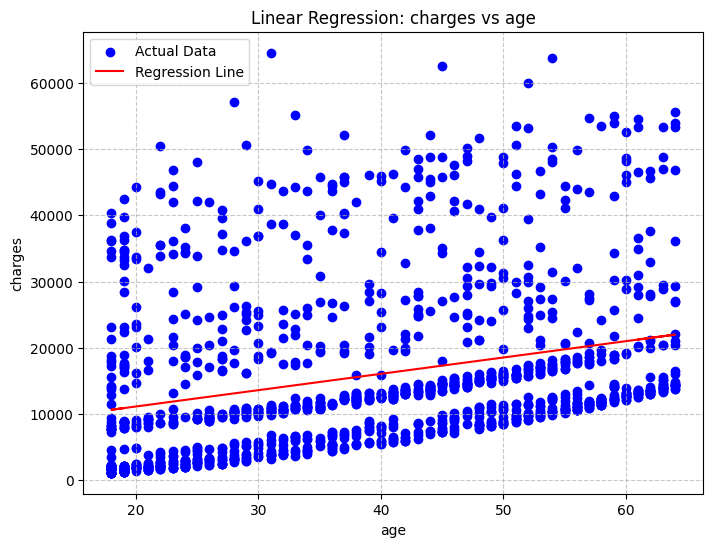


Performing Linear Regression for Feature: bmi


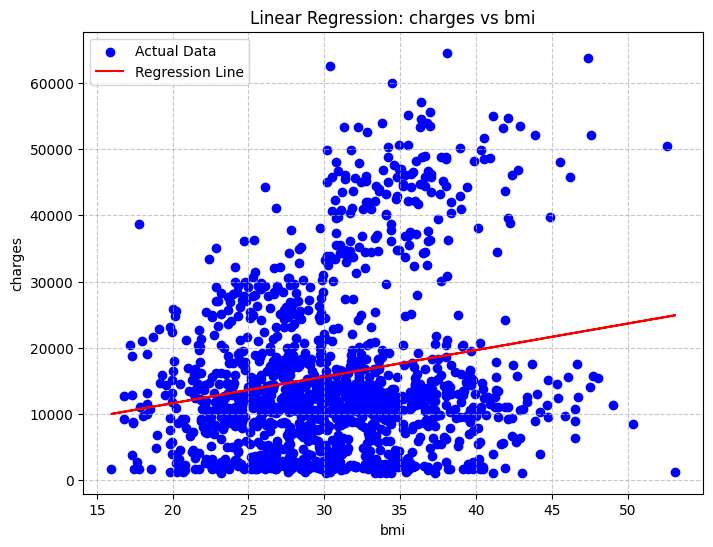


Performing Linear Regression for Feature: children


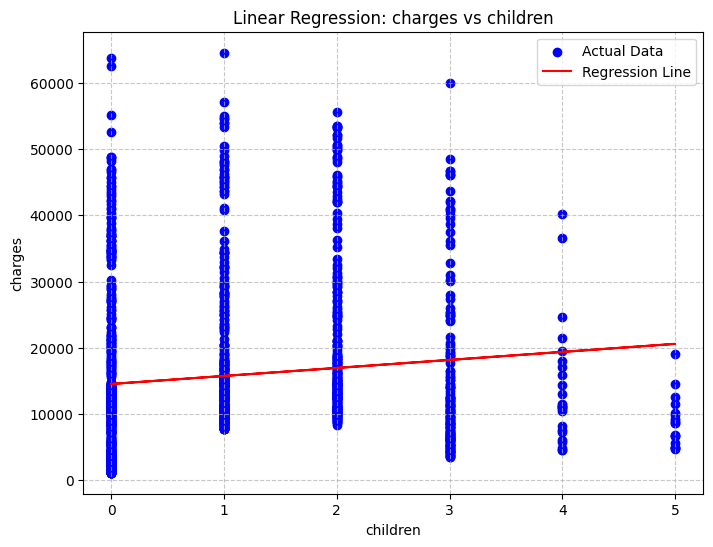


Performing Linear Regression for Feature: sex_male


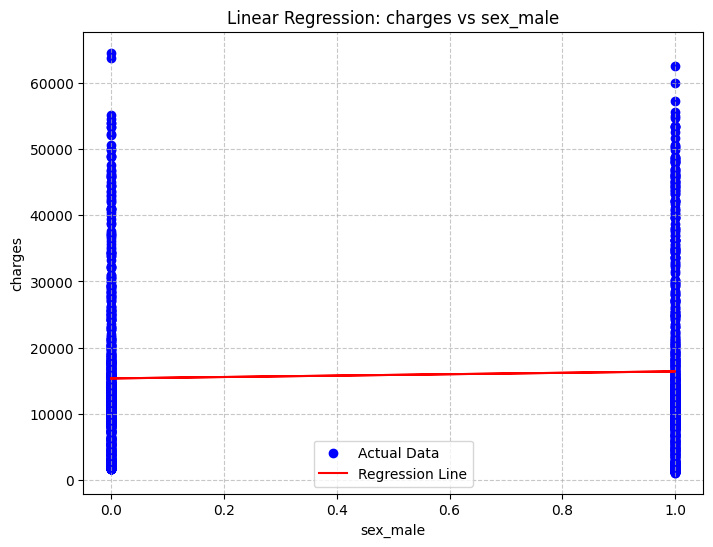


Performing Linear Regression for Feature: smoker_yes


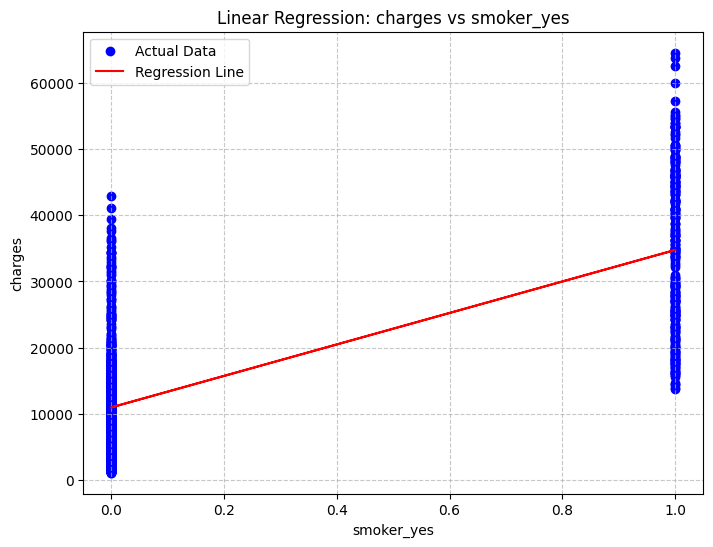


Performing Linear Regression for Feature: region_northwest


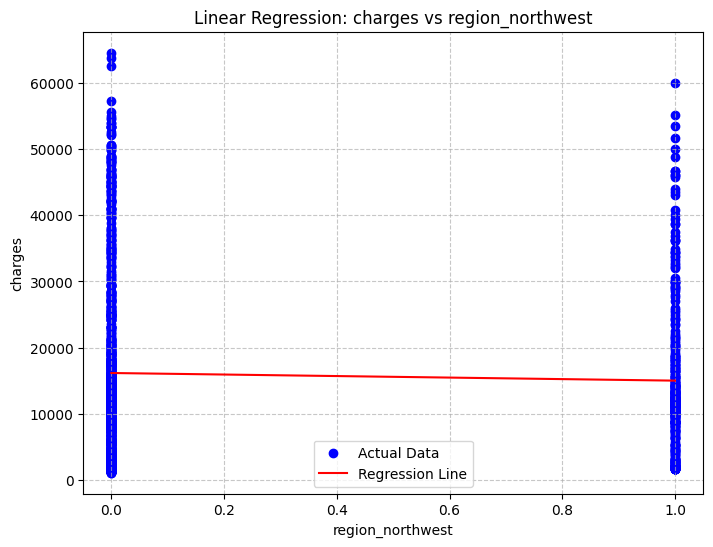


Performing Linear Regression for Feature: region_southeast


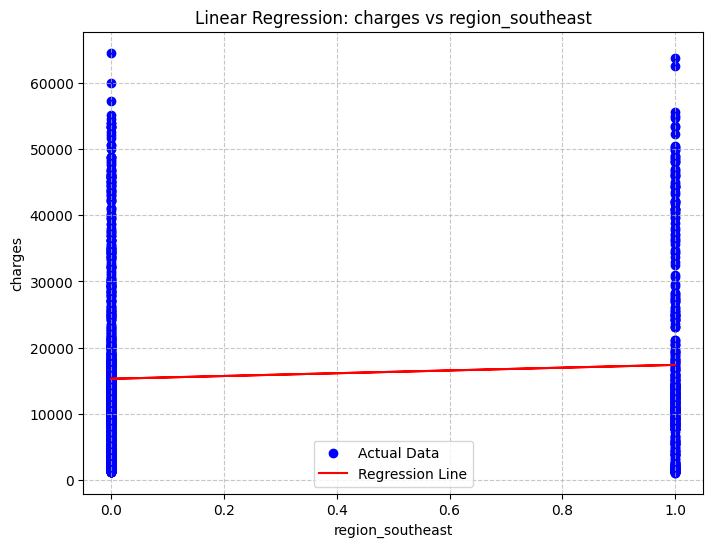


Performing Linear Regression for Feature: region_southwest


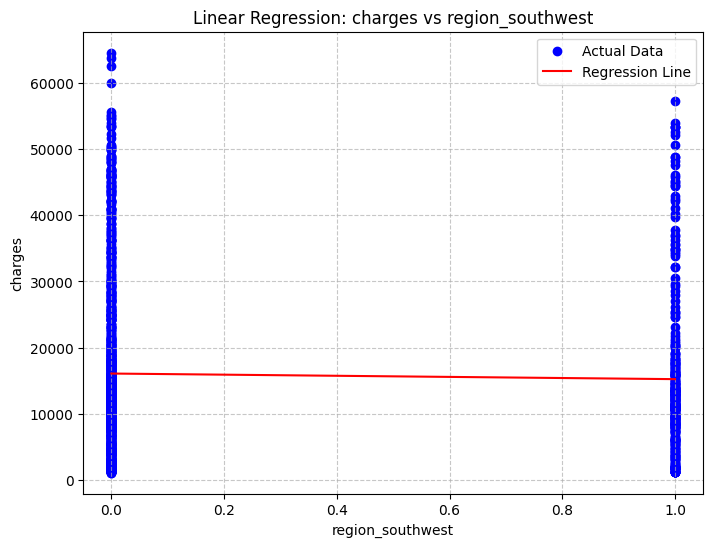


Summary of Results:
+------------------+----------------------------+------------------+
| Feature          |   Mean Squared Error (MSE) |   R-squared (R2) |
+==================+============================+==================+
| age              |                1.44132e+08 |      0.119978    |
+------------------+----------------------------+------------------+
| bmi              |                1.58892e+08 |      0.0298642   |
+------------------+----------------------------+------------------+
| children         |                1.60807e+08 |      0.0181723   |
+------------------+----------------------------+------------------+
| sex_male         |                1.6271e+08  |      0.00655252  |
+------------------+----------------------------+------------------+
| smoker_yes       |                7.95302e+07 |      0.514416    |
+------------------+----------------------------+------------------+
| region_northwest |                1.63929e+08 |     -0.000892787 |
+------------

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Creating a copy of the DataFrame
insurance_df_copy = insurance_df.copy()

# One-hot encoding for categorical variables
insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

y = insurance_df_copy_encoded[target_variable]

# Initialize a list to store the results
results = []

# Loop through all columns in the DataFrame except the target variable
for feature in insurance_df_copy_encoded.columns:
    # Skip the target variable
    if feature == target_variable:
        continue

    print(f"\nPerforming Linear Regression for Feature: {feature}")
    
    # Define the feature (X) as a single column
    X = insurance_df_copy_encoded[[feature]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results for the current feature
    results.append([feature, mse, r2])
    
    # Visualize the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color="blue", label="Actual Data")
    plt.plot(X, model.predict(X), color="red", label="Regression Line")
    plt.title(f"Linear Regression: {target_variable} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

# Create and print a table with the results
headers = ["Feature", "Mean Squared Error (MSE)", "R-squared (R2)"]
print("\nSummary of Results:")
print(tabulate(results, headers=headers, tablefmt="grid"))

In [ ]:
# Top Performer:

# smoker_yes:
# MSE: 7.95 × 10^7

# R2: # 0.514
# Insight: Smoking status (smoker_yes) is the strongest predictor of charges.

## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



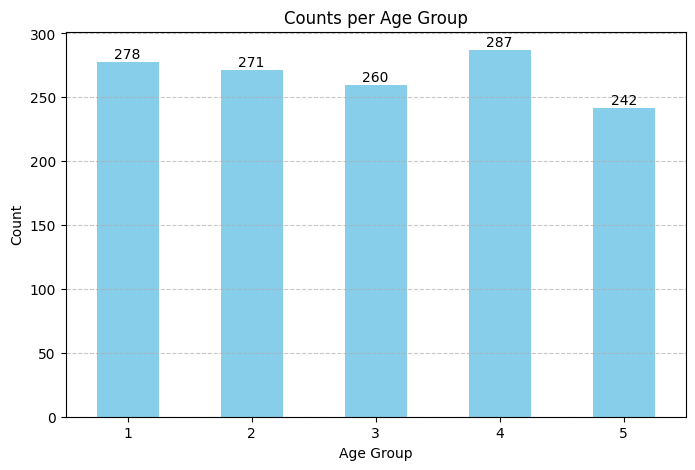

In [57]:
# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
)

# creating age groups

# i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# I will use: 

# 18 - 24 
# 25 - 34 
# 35 - 44 
# 45 - 54 
# 55 - 64 


def assign_age_group(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return None
    

# Apply the function to create the 'age_group' column
insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)

# det counts per age group
age_group_counts = insurance_df_copy_encoded['age_group'].value_counts().sort_index()

# Plot the counts per age group
plt.figure(figsize=(8, 5))
ax = age_group_counts.plot(kind='bar', color='skyblue')

for i, count in enumerate(age_group_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
    
plt.title("Counts per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(ticks=range(len(age_group_counts)), labels=age_group_counts.index, rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
